# Playing with data sampler

In [1]:
from data import v2, v1, AnnotationTransform, VOCDetection, detection_collate, VOCroot, VOC_CLASSES
import torch.utils.data as data

In [2]:
!ls ../data/VOCdevkit/

VOC2007  VOC2012


In [3]:
train_sets = [('2007', 'trainval'), ('2012', 'trainval')]
voc_root = '../data/VOCdevkit/'
from utils.augmentations import SSDAugmentation
import torch.utils.data as data

ssd_dim = 300  # only support 300 now
means = (104, 117, 123)  # only support voc now

dataset = VOCDetection(voc_root, train_sets, SSDAugmentation(ssd_dim, means), AnnotationTransform())

batch_size = 16
num_workers = 4

data_loader = data.DataLoader(dataset, batch_size, num_workers=num_workers,
                                  shuffle=True, collate_fn=detection_collate, pin_memory=True)
    

In [13]:
inputs, classes = next(iter(data_loader))
inputs.shape

torch.Size([16, 3, 300, 300])

In [ ]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array((104, 117, 123))
    # std = np.array([0.229, 0.224, 0.225])
    inp = inp + mean
    # inp = std * inp + mean
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(data_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out)
plt.show()

In [12]:
1+1

2

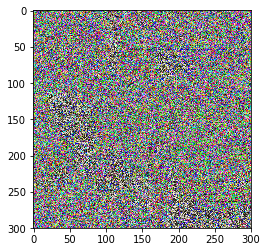

In [34]:
import matplotlib.pyplot as plt


(104, 117, 123)

plt.imshow(dataset.__getitem__(1)[0].numpy().transpose((1, 2, 0)))
plt.show()

In [ ]:
data_loader = data.DataLoader(dataset, batch_size, num_workers=args.num_workers,
                              shuffle=True, collate_fn=detection_collate, pin_memory=True)